
# Chapter 4




# Lab: Logistic Regression, LDA, QDA, and KNN


## The Stock Market Data

In this lab we will examine the `Smarket` 
data, which is part of the `ISLP`
library. This data set consists of percentage returns for the S&P 500
stock index over 1,250 days, from the beginning of 2001 until the end
of 2005. For each date, we have recorded the percentage returns for
each of the five previous trading days,  `Lag1`  through
 `Lag5`. We have also recorded  `Volume`  (the number of
shares traded on the previous day, in billions),  `Today`  (the
percentage return on the date in question) and  `Direction`
(whether the market was  `Up`  or  `Down`  on this date).

We start by importing  our libraries at this top level; these are all imports we have seen in previous labs.

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

We also collect together the new imports needed for this lab.

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
from glmnet.glm import GLM

## Linear and Poisson Regression on the Bikeshare Data
Here we fit linear and  Poisson regression models to the `Bikeshare` data, as described in Section 4.6.
The response `bikers` measures the number of bike rentals per hour
in Washington, DC in the period 2010--2012.

In [4]:
Bike = load_data('Bikeshare')


Let's have a peek at the dimensions and names of the variables in this dataframe.

In [5]:
Bike.shape, Bike.columns


((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

### Linear Regression

We begin by fitting a linear regression model to the data.

In [6]:
X = MS(['mnth',
        'hr',
        'workingday',
        'temp',
        'weathersit']).fit_transform(Bike)
X = X.drop(columns=['intercept'])
Y = Bike['bikers']
OLS = GLM(summarize=True)
OLS.fit(X, Y)
OLS.summary_


,coef,std err,t,P>|t|
intercept,-68.631704,0.069368,-989.388116,0.0
mnth[Feb],6.845203,0.056042,122.144218,0.0
mnth[March],16.551438,0.056222,294.392217,0.0
mnth[April],41.424907,0.064995,637.357769,0.0
mnth[May],72.557084,0.073739,983.975257,0.0
mnth[June],67.818749,0.085534,792.890854,0.0
mnth[July],45.324460,0.092560,489.674696,0.0
mnth[Aug],53.243041,0.086791,613.462784,0.0
mnth[Sept],66.678277,0.077446,860.961728,0.0
mnth[Oct],75.834252,0.064707,1171.960145,0.0


There are 24 levels in `hr` and 40 rows in all.
In `M_lm`, the first levels `hr[0]` and `mnth[Jan]`  are treated
as the baseline values, and so no coefficient estimates are provided
for them: implicitly, their coefficient estimates are zero, and all
other levels are measured relative to these baselines. For example,
the Feb coefficient of $6.845$ signifies that, holding all other
variables constant, there are on average about 7 more riders in
February than in January. Similarly there are about 16.5 more riders
in March than in January.

The results seen in Section 4.6.1
used a slightly different coding of the variables `hr` and `mnth`, as follows:

In [7]:
hr_encode = contrast('hr', 'sum')
mnth_encode = contrast('mnth', 'sum')


Refitting again:

In [8]:
X2 = MS([mnth_encode,
         hr_encode,
        'workingday',
        'temp',
        'weathersit'],
       intercept=False).fit_transform(Bike)
OLS2 = GLM(summarize=True)
OLS2.fit(X2, Y)
S2 = OLS2.summary_
S2

,coef,std err,t,P>|t|
intercept,73.597428,0.067084,1097.086124,0.000000e+00
mnth[Jan],-46.087090,0.053402,-863.023022,0.000000e+00
mnth[Feb],-39.241888,0.046260,-848.284279,0.000000e+00
mnth[March],-29.535652,0.041243,-716.142196,0.000000e+00
mnth[April],-4.662183,0.035822,-130.147025,0.000000e+00
mnth[May],26.469993,0.037264,710.337952,0.000000e+00
mnth[June],21.731658,0.045293,479.798911,0.000000e+00
mnth[July],-0.762630,0.051087,-14.927932,2.168877e-50
mnth[Aug],7.155950,0.046203,154.881227,0.000000e+00
mnth[Sept],20.591186,0.039810,517.241598,0.000000e+00


What is the difference between the two codings?  In `M2_lm`, a
coefficient estimate is reported for all but level `23` of `hr`
and level `Dec` of `mnth`. Importantly, in `M2_lm`, the (unreported) coefficient estimate
for the last level of `mnth` is not zero: instead, it equals the
negative of the sum of the coefficient estimates for all of the
other levels. Similarly, in `M2_lm`, the coefficient estimate
for the last level of `hr` is the negative of the sum of the
coefficient estimates for all of the other levels. This means that the
coefficients of `hr` and `mnth` in `M2_lm` will always sum
to zero, and can be interpreted as the difference from the mean
level. For example, the coefficient for January of $-46.087$ indicates
that, holding all other variables constant, there are typically 46
fewer riders in January relative to the yearly average.

It is important to realize that the choice of coding really does not
matter, provided that we interpret the  model output correctly in light
of the coding used. For example, we see that the predictions from the
linear model are the same regardless of coding:

In [9]:
fit1 = OLS.predict(X)
fit2 = OLS2.predict(X2)
np.sum((fit1 - fit2)**2)


1.3360284202090695e-20

The sum of squared differences is zero. We can also see this using the
`np.allclose()` function:

In [10]:
np.allclose(fit1, fit2, rtol=1e-3)


True

To reproduce the left-hand side of Figure 4.13
we must first obtain the coefficient estimates associated with
`mnth`. The coefficients for January through November can be obtained
directly from the `M2_lm` object. The coefficient for December
must be explicitly computed as the negative sum of all the other
months. We first extract all the coefficients for month from
the coefficients of `M2_lm`.

In [11]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
coef_month


mnth[Jan]     -46.087090
mnth[Feb]     -39.241888
mnth[March]   -29.535652
mnth[April]    -4.662183
mnth[May]      26.469993
mnth[June]     21.731658
mnth[July]     -0.762630
mnth[Aug]       7.155950
mnth[Sept]     20.591186
mnth[Oct]      29.747162
mnth[Nov]      14.222913
Name: coef, dtype: float64

Next, we append `Dec` as the negative of the sum of all other months.

In [12]:
months = Bike['mnth'].dtype.categories
coef_month = pd.concat([
                       coef_month,
                       pd.Series([-coef_month.sum()],
                                  index=['mnth[Dec]'
                                 ])
                       ])
coef_month


mnth[Jan]     -46.087090
mnth[Feb]     -39.241888
mnth[March]   -29.535652
mnth[April]    -4.662183
mnth[May]      26.469993
mnth[June]     21.731658
mnth[July]     -0.762630
mnth[Aug]       7.155950
mnth[Sept]     20.591186
mnth[Oct]      29.747162
mnth[Nov]      14.222913
mnth[Dec]       0.370582
dtype: float64

Finally, to make the plot neater, we’ll just use the first letter of each month, which is the $6$th entry of each of
the labels in the index.

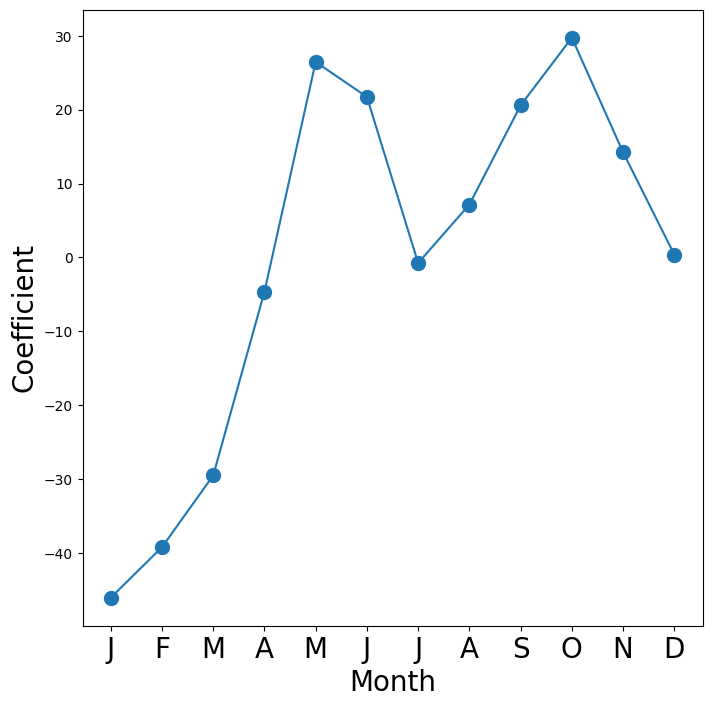

In [13]:
fig_month, ax_month = subplots(figsize=(8,8))
x_month = np.arange(coef_month.shape[0])
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20);


Reproducing the  right-hand plot in Figure 4.13  follows a similar process.

In [14]:
coef_hr = S2[S2.index.str.contains('hr')]['coef']
coef_hr = coef_hr.reindex(['hr[{0}]'.format(h) for h in range(23)])
coef_hr = pd.concat([coef_hr,
                     pd.Series([-coef_hr.sum()], index=['hr[23]'])
                    ])


We now make the hour plot.

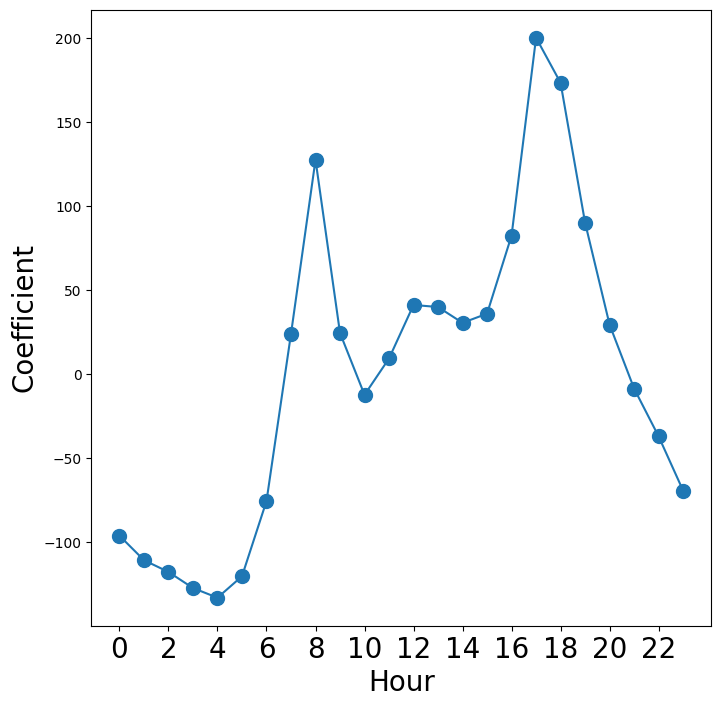

In [15]:
fig_hr, ax_hr = subplots(figsize=(8,8))
x_hr = np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);


### Poisson Regression

Now we fit instead a Poisson regression model to the
`Bikeshare` data. Very little changes, except that we now use the
function `sm.GLM()` with the Poisson family specified:

In [16]:
Poisson_GLM = GLM(family=sm.families.Poisson(),
                  summarize=True)
Poisson_GLM.fit(X2, Y)

GLM(fit_intercept=True, summarize=True, family=<statsmodels.genmod.families.family.Poisson object at 0x1397c2fe0>, control=GLMControl(mxitnr=25, epsnr=1e-06, big=9.9e+35, logging=False))

In [17]:
Poisson_GLM.score(X2, Y)

-114020.49333264619

We can plot the coefficients associated with `mnth` and `hr`, in order to reproduce  Figure 4.15. We first complete these coefficients as before.

In [18]:
S_pois = Poisson_GLM.summary_
coef_month = S_pois[S_pois.index.str.contains('mnth')]['coef']
coef_month = pd.concat([coef_month,
                        pd.Series([-coef_month.sum()],
                                   index=['mnth[Dec]'])])
coef_hr = S_pois[S_pois.index.str.contains('hr')]['coef']
coef_hr = pd.concat([coef_hr,
                     pd.Series([-coef_hr.sum()],
                     index=['hr[23]'])])
S_pois

,coef,std err,t,P>|t|
intercept,4.118245,0.005945,692.781381,0.000000e+00
mnth[Jan],-0.670170,0.005907,-113.444763,0.000000e+00
mnth[Feb],-0.444124,0.004860,-91.378556,0.000000e+00
mnth[March],-0.293733,0.004144,-70.885703,0.000000e+00
mnth[April],0.021523,0.003125,6.887878,5.663077e-12
mnth[May],0.240471,0.002916,82.462429,0.000000e+00
mnth[June],0.223235,0.003554,62.817770,0.000000e+00
mnth[July],0.103617,0.004125,25.121259,2.913659e-139
mnth[Aug],0.151171,0.003662,41.280638,0.000000e+00
mnth[Sept],0.233493,0.003102,75.281361,0.000000e+00


The plotting is as before.

/var/folders/dm/pr1j360n4_9g03p0vy7zfpmr0000gq/T/ipykernel_17190/1472285317.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_hr.set_xticklabels(range(24)[::2], fontsize=20)


array([3.53371786e-05, 3.48980341e-05, 2.36221570e-05, 1.71707222e-05,
       9.76432954e-06, 8.50379373e-06, 1.26287517e-05, 1.70127970e-05,
       1.34105414e-05, 9.61995223e-06, 7.75393659e-06, 1.01145913e-05,
       6.20818357e-05, 9.90680500e-05, 1.40868769e-04, 2.69753510e-04,
       5.07889359e-04, 1.81287924e-04, 4.75518840e-05, 1.94128811e-05,
       1.26975788e-05, 1.83723016e-05, 2.22751928e-05, 1.92932915e-05,
       1.65545514e-05, 1.67206524e-05, 1.74559811e-05, 1.70763570e-05,
       1.43200036e-05, 1.05890036e-05, 1.10259518e-05, 1.36863364e-05,
       1.75606684e-05, 2.17027347e-05, 2.72965548e-05, 3.82120157e-06,
       1.31678623e-04, 4.74727831e-06, 2.78160897e-02, 1.64645311e-05])

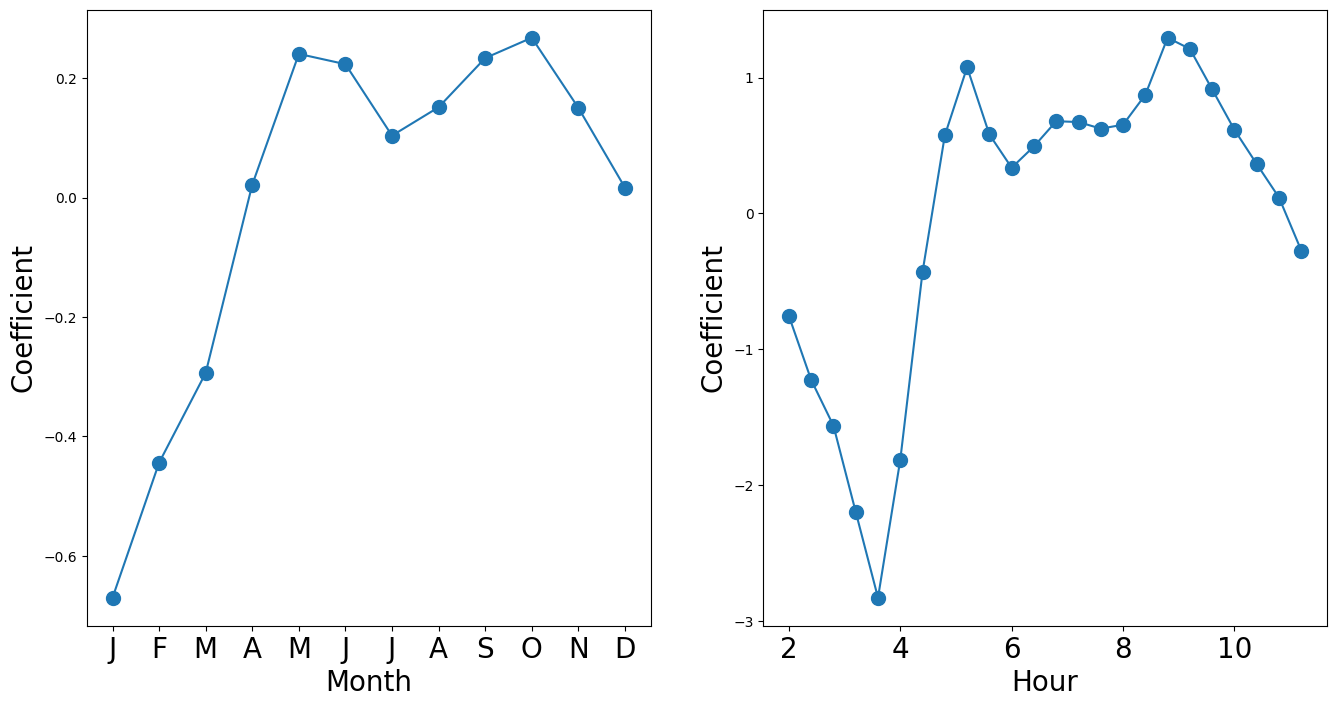

In [19]:
fig_pois, (ax_month, ax_hr) = subplots(1, 2, figsize=(16,8))
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20)
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);
np.diag(Poisson_GLM.covariance_)

We compare the fitted values of the two models.
The fitted values are stored in the `fittedvalues` attribute
returned by the `fit()` method for both the linear regression and the Poisson
fits. The linear predictors are stored as the attribute `lin_pred`.

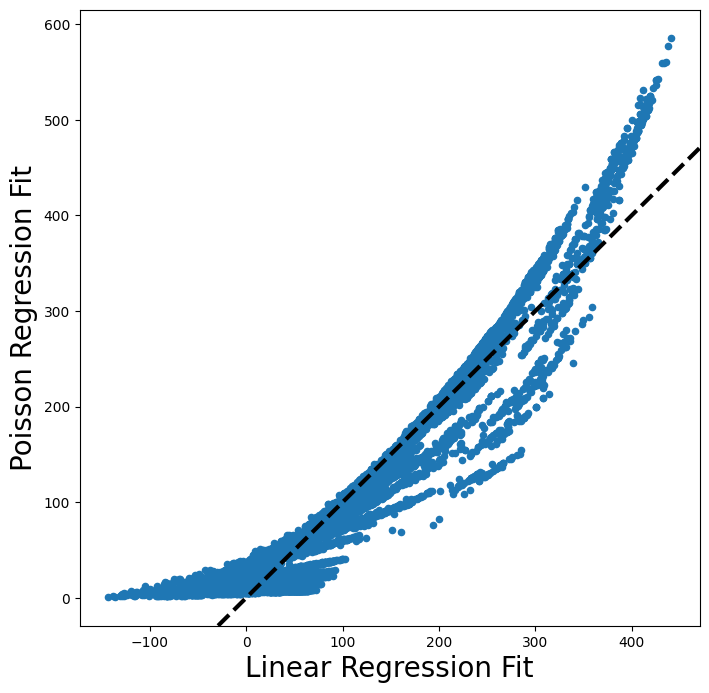

In [20]:
fig, ax = subplots(figsize=(8, 8))
fit_pois = Poisson_GLM.predict(X2)
ax.scatter(fit2,
           fit_pois,
           s=20)
ax.set_xlabel('Linear Regression Fit', fontsize=20)
ax.set_ylabel('Poisson Regression Fit', fontsize=20)
ax.axline([0,0], c='black', linewidth=3,
          linestyle='--', slope=1);


The predictions from the Poisson regression model are correlated with
those from the linear model; however, the former are non-negative. As
a result the Poisson regression predictions tend to be larger than
those from the linear model for either very low or very high levels of
ridership.

In this section, we fit Poisson regression models using the `sm.GLM()` function with the argument
`family=sm.families.Poisson()`. Earlier in this lab we used the `sm.GLM()` function
with `family=sm.families.Binomial()` to perform logistic regression. Other
choices for the `family` argument can be used to fit other types
of GLMs. For instance, `family=sm.families.Gamma()` fits a Gamma regression
model.



## Cross-validating a GLM

In [21]:
from sklearn.model_selection import cross_validate, KFold
cv = KFold(5, shuffle=True, random_state=0)
cross_validate(Poisson_GLM, X2, Y, cv=cv)

/Users/jtaylo/anaconda3/envs/pyglmnet/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jtaylo/git-repos/pyglmnet/glmnet/glm.py", line 145, in newton_step
    beta = np.linalg.solve(Q, V)
  File "<__array_function__ internals>", line 200, in solve
  File "/Users/jtaylo/anaconda3/envs/pyglmnet/lib/python3.10/site-packages/numpy/linalg/linalg.py", line 386, in solve
    r = gufunc(a, b, signature=signature, extobj=extobj)
  File "/Users/jtaylo/anaconda3/envs/pyglmnet/lib/python3.10/site-packages/numpy/linalg/linalg.py", line 89,

{'fit_time': array([0.02918601, 0.03056693, 0.02727914, 0.00334096, 0.01129913]),
 'score_time': array([0.00089121, 0.0009892 , 0.00266719, 0.        , 0.00078797]),
 'test_score': array([-22194.9497411 , -22955.43107546, -23490.73107438,             nan,
        -23060.30191966])}